In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/Electronic - Electronic.csv.csv')

In [3]:
data.shape

(5000, 15)

In [4]:
data.head()

Age  Items Purchased  Total Spent  Discount (%)  Satisfaction Score  \
0   56                1    29.226195     47.077380            1.000000   
1   69               10   420.142612      7.985739            3.760294   
2   46                4   127.742817     37.225718            1.771240   
3   32                9   417.722683      8.227732            1.926831   
4   60               13   608.031366      5.000000            3.902927   

   Warranty Extension  Gender Region Product Category Payment Method  \
0                   1    Male  South      Accessories            UPI   
1                   1  Female  South      Accessories           Cash   
2                   1    Male   East           Laptop    Credit Card   
3                   0  Female   East           Tablet            UPI   
4                   0  Female  South           Tablet            UPI   

       Revenue  Store Rating  Loyalty Score  Membership Status  \
0   149.252145      3.660461       3.597133                1.0   
1  1485.524222      3.551553      25.764903                1.0   
2    85.550131      3.922839       7.022399                1.0   
3   824.118724      3.860422       7.635412                1.0   
4  2463.590392      3.812820      29.461119                0.0   

  Preferred Visit Time  
0              Evening  
1              Evening  
2              Morning  
3            Afternoon  
4              Morning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

In [6]:
data.describe()

Age  Items Purchased  Total Spent  Discount (%)  \
count  5000.000000      5000.000000  5000.000000   5000.000000   
mean     43.584600         7.536600   243.721837     26.622330   
std      14.919094         4.014858   154.949018     13.586725   
min      18.000000         1.000000    15.105730      5.000000   
25%      31.000000         4.000000   119.130074     15.382663   
50%      43.000000         7.000000   221.514206     27.848579   
75%      56.000000        11.000000   346.173367     38.086993   
max      69.000000        14.000000   699.611576     48.489427   

       Satisfaction Score  Warranty Extension      Revenue  Store Rating  \
count         5000.000000         5000.000000  5000.000000   4997.000000   
mean             2.650108            0.220400   717.998214      3.975184   
std              1.533394            0.414558   776.789137      0.250691   
min              1.000000            0.000000  -201.427094      3.076092   
25%              1.000000            0.000000   164.697614      3.799761   
50%              2.338884            0.000000   380.548500      3.969738   
75%              4.129317            0.000000  1047.426498      4.149998   
max              5.000000            1.000000  3523.469177      4.764298   

       Loyalty Score  Membership Status  
count    5000.000000        4994.000000  
mean       15.638275           0.308370  
std         9.144742           0.461867  
min         0.000000           0.000000  
25%         7.944790           0.000000  
50%        13.969791           0.000000  
75%        23.521601           1.000000  
max        39.235391           1.000000

In [7]:
df=data.copy()

# Data cleaning


In [8]:
df.duplicated().sum()

0

**Missing value handling**

In [9]:

df.isnull().sum()

Age                     0
Items Purchased         0
Total Spent             0
Discount (%)            0
Satisfaction Score      0
Warranty Extension      0
Gender                  2
Region                  0
Product Category        0
Payment Method          4
Revenue                 0
Store Rating            3
Loyalty Score           0
Membership Status       6
Preferred Visit Time    8
dtype: int64

In [10]:
df.isnull().sum()/df.shape[0]*100

Age                     0.00
Items Purchased         0.00
Total Spent             0.00
Discount (%)            0.00
Satisfaction Score      0.00
Warranty Extension      0.00
Gender                  0.04
Region                  0.00
Product Category        0.00
Payment Method          0.08
Revenue                 0.00
Store Rating            0.06
Loyalty Score           0.00
Membership Status       0.12
Preferred Visit Time    0.16
dtype: float64

Since all of them are of fewer proportions, let's drop the corresponding rows.

In [11]:
df.dropna(inplace = True)

In [12]:
df.isna().sum().sum()

0



> Missing values have been handled by eliminating rows containg them.



# EDA

In [13]:
single_value_columns = [col for col in df.columns if df[col].nunique() == 1]

if single_value_columns:
    print("Columns with only one unique value:", single_value_columns)
else:
    print("No columns with only one unique value found.")

No columns with only one unique value found.


In [14]:
proportion_unique = {col: df[col].nunique() / df.shape[0] for col in df.columns}
proportion_unique

{'Age': 0.010445962233828847,
 'Items Purchased': 0.002812374447569305,
 'Total Spent': 1.0,
 'Discount (%)': 0.883688228204098,
 'Satisfaction Score': 0.5570510245078345,
 'Warranty Extension': 0.0004017677782241864,
 'Gender': 0.0006026516673362796,
 'Region': 0.0008035355564483728,
 'Product Category': 0.001004419445560466,
 'Payment Method': 0.001004419445560466,
 'Revenue': 1.0,
 'Store Rating': 1.0,
 'Loyalty Score': 0.9923664122137404,
 'Membership Status': 0.0004017677782241864,
 'Preferred Visit Time': 0.0006026516673362796}



*   Columns like 'Total Spent', 'Revenue', 'Store Rating' consist of (all) unique values.

*   'Loyalty Score' column is composed of alomost 99% of unique values



In [15]:
cat_df = df.select_dtypes(include='object')
cat_df.columns

Index(['Gender', 'Region', 'Product Category', 'Payment Method',
       'Preferred Visit Time'],
      dtype='object')

In [16]:
cat_df.nunique()

Gender                  3
Region                  4
Product Category        5
Payment Method          5
Preferred Visit Time    3
dtype: int64

In [17]:
for col in cat_df.columns:
  print(f'\n{cat_df[col].value_counts()}')


Gender
Male      2440
Female    2357
Other      181
Name: count, dtype: int64

Region
South    1308
West     1273
East     1202
North    1195
Name: count, dtype: int64

Product Category
Accessories    1011
Laptop         1006
Tablet          995
Television      985
Mobile          981
Name: count, dtype: int64

Payment Method
Net Banking    1032
Cash           1013
Credit Card    1006
Debit Card      975
UPI             952
Name: count, dtype: int64

Preferred Visit Time
Morning      1671
Afternoon    1654
Evening      1653
Name: count, dtype: int64


In [18]:
for col in cat_df.columns:
  print(f'\n{cat_df[col].value_counts(normalize=True)}')


Gender
Male      0.490157
Female    0.473483
Other     0.036360
Name: proportion, dtype: float64

Region
South    0.262756
West     0.255725
East     0.241462
North    0.240056
Name: proportion, dtype: float64

Product Category
Accessories    0.203094
Laptop         0.202089
Tablet         0.199879
Television     0.197871
Mobile         0.197067
Name: proportion, dtype: float64

Payment Method
Net Banking    0.207312
Cash           0.203495
Credit Card    0.202089
Debit Card     0.195862
UPI            0.191241
Name: proportion, dtype: float64

Preferred Visit Time
Morning      0.335677
Afternoon    0.332262
Evening      0.332061
Name: proportion, dtype: float64




>No standardisation is needed for the entries in categorical columns.



In [19]:
num_df = df.select_dtypes(include='number')
num_df.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status'],
      dtype='object')

In [20]:
for col in num_df.columns:
  print(f'\n{num_df[col].value_counts()}')


Age
66    118
64    117
52    114
43    110
54    109
25    109
38    109
62    108
45    108
51    106
42    104
39    104
34    104
46    103
68    103
50    102
58    102
21    102
49    101
53    100
40    100
61     99
41     99
28     98
37     97
29     97
19     96
23     96
22     95
47     95
20     95
57     94
18     93
36     93
56     93
30     91
31     91
35     90
32     90
26     89
55     88
27     87
69     87
67     84
63     81
44     80
65     78
33     78
59     77
24     74
60     71
48     69
Name: count, dtype: int64

Items Purchased
10    404
13    393
7     385
6     382
2     363
11    347
1     345
12    345
3     344
4     342
9     334
5     333
14    331
8     330
Name: count, dtype: int64

Total Spent
29.226195     1
72.837942     1
243.672980    1
286.013801    1
198.635967    1
             ..
182.042708    1
106.576625    1
430.511877    1
95.015680     1
366.613874    1
Name: count, Length: 4978, dtype: int64

Discount (%)
5.000000     580
47.077

❌

> 'Membership' and 'Warrenty extension' have values of 0 and 1 (0 corresponds to NO usually but no further details have been given)



In [21]:
satisfaction_counts = df['Satisfaction Score'].value_counts()
satisfaction_counts

Satisfaction Score
1.000000    1431
5.000000     776
1.845655       1
4.622227       1
1.128339       1
            ... 
1.185899       1
2.338541       1
2.008539       1
3.823895       1
2.718373       1
Name: count, Length: 2773, dtype: int64

In [22]:
df['Satisfaction Score'].value_counts(normalize = True)

Satisfaction Score
1.000000    0.287465
5.000000    0.155886
1.845655    0.000201
4.622227    0.000201
1.128339    0.000201
              ...   
1.185899    0.000201
2.338541    0.000201
2.008539    0.000201
3.823895    0.000201
2.718373    0.000201
Name: proportion, Length: 2773, dtype: float64

# Pie plots

> **analysing the distribution of Satisfaction score, Loyalty score and Preffered visit time.**






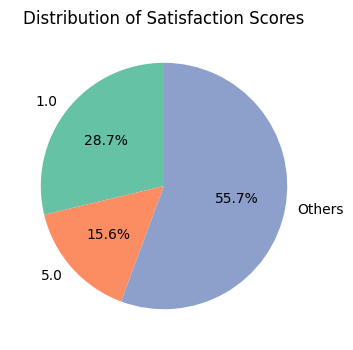

In [23]:
# Pie plot for Satisfaction score

threshold = 200
satisfaction_counts_filtered = satisfaction_counts[satisfaction_counts >= threshold]
others_count = satisfaction_counts[satisfaction_counts < threshold].sum()
satisfaction_counts_filtered['Others'] = others_count

plt.figure(figsize=(4,4))
plt.pie(satisfaction_counts_filtered, labels=satisfaction_counts_filtered.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(satisfaction_counts_filtered)))
plt.title('Distribution of Satisfaction Scores')
plt.show()



> Most recurring of all Satisfaction scores are 1 and 5.
 While, values in between constitute more than half of the total counts.



In [24]:
loyalty_counts = df['Loyalty Score'].value_counts()
loyalty_counts

Loyalty Score
0.000000     39
3.597133      1
8.803139      1
11.538862     1
18.730772     1
             ..
27.617061     1
13.320441     1
11.092465     1
29.241904     1
19.076740     1
Name: count, Length: 4940, dtype: int64

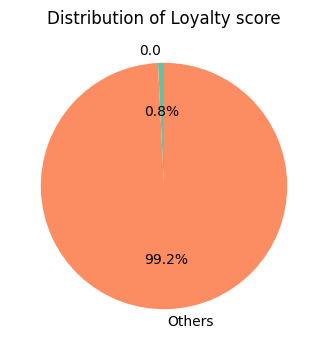

In [25]:
# Pie plot for Loyalty score

threshold = 10
loyalty_counts_filtered = loyalty_counts[loyalty_counts >= threshold]
others_count = loyalty_counts[loyalty_counts < threshold].sum()
loyalty_counts_filtered['Others'] = others_count

plt.figure(figsize=(4,4))
plt.pie(loyalty_counts_filtered, labels=loyalty_counts_filtered.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(loyalty_counts_filtered)))
plt.title('Distribution of Loyalty score')
plt.show()



> 0.8% of the total loyalty scores are 0,  which is the only repeating score. While rest of them are unique and are greater than 0.



In [26]:
visit_counts = df['Preferred Visit Time'].value_counts()
visit_counts

Preferred Visit Time
Morning      1671
Afternoon    1654
Evening      1653
Name: count, dtype: int64

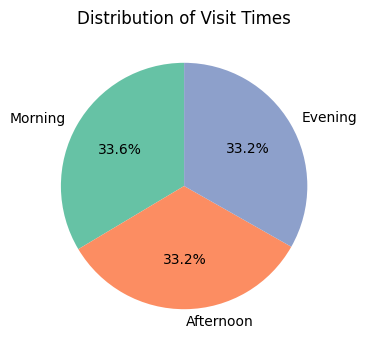

In [27]:
# Pie plot for Visit Times

plt.figure(figsize=(4,4))
plt.pie(visit_counts, labels=visit_counts.index, autopct='%1.1f%%', startangle=90 ,colors=sns.color_palette("Set2"))
plt.title('Distribution of Visit Times')
plt.show()



> No distict trends are visible for visit times.



# Scatter plots

<Figure size 1200x600 with 0 Axes>

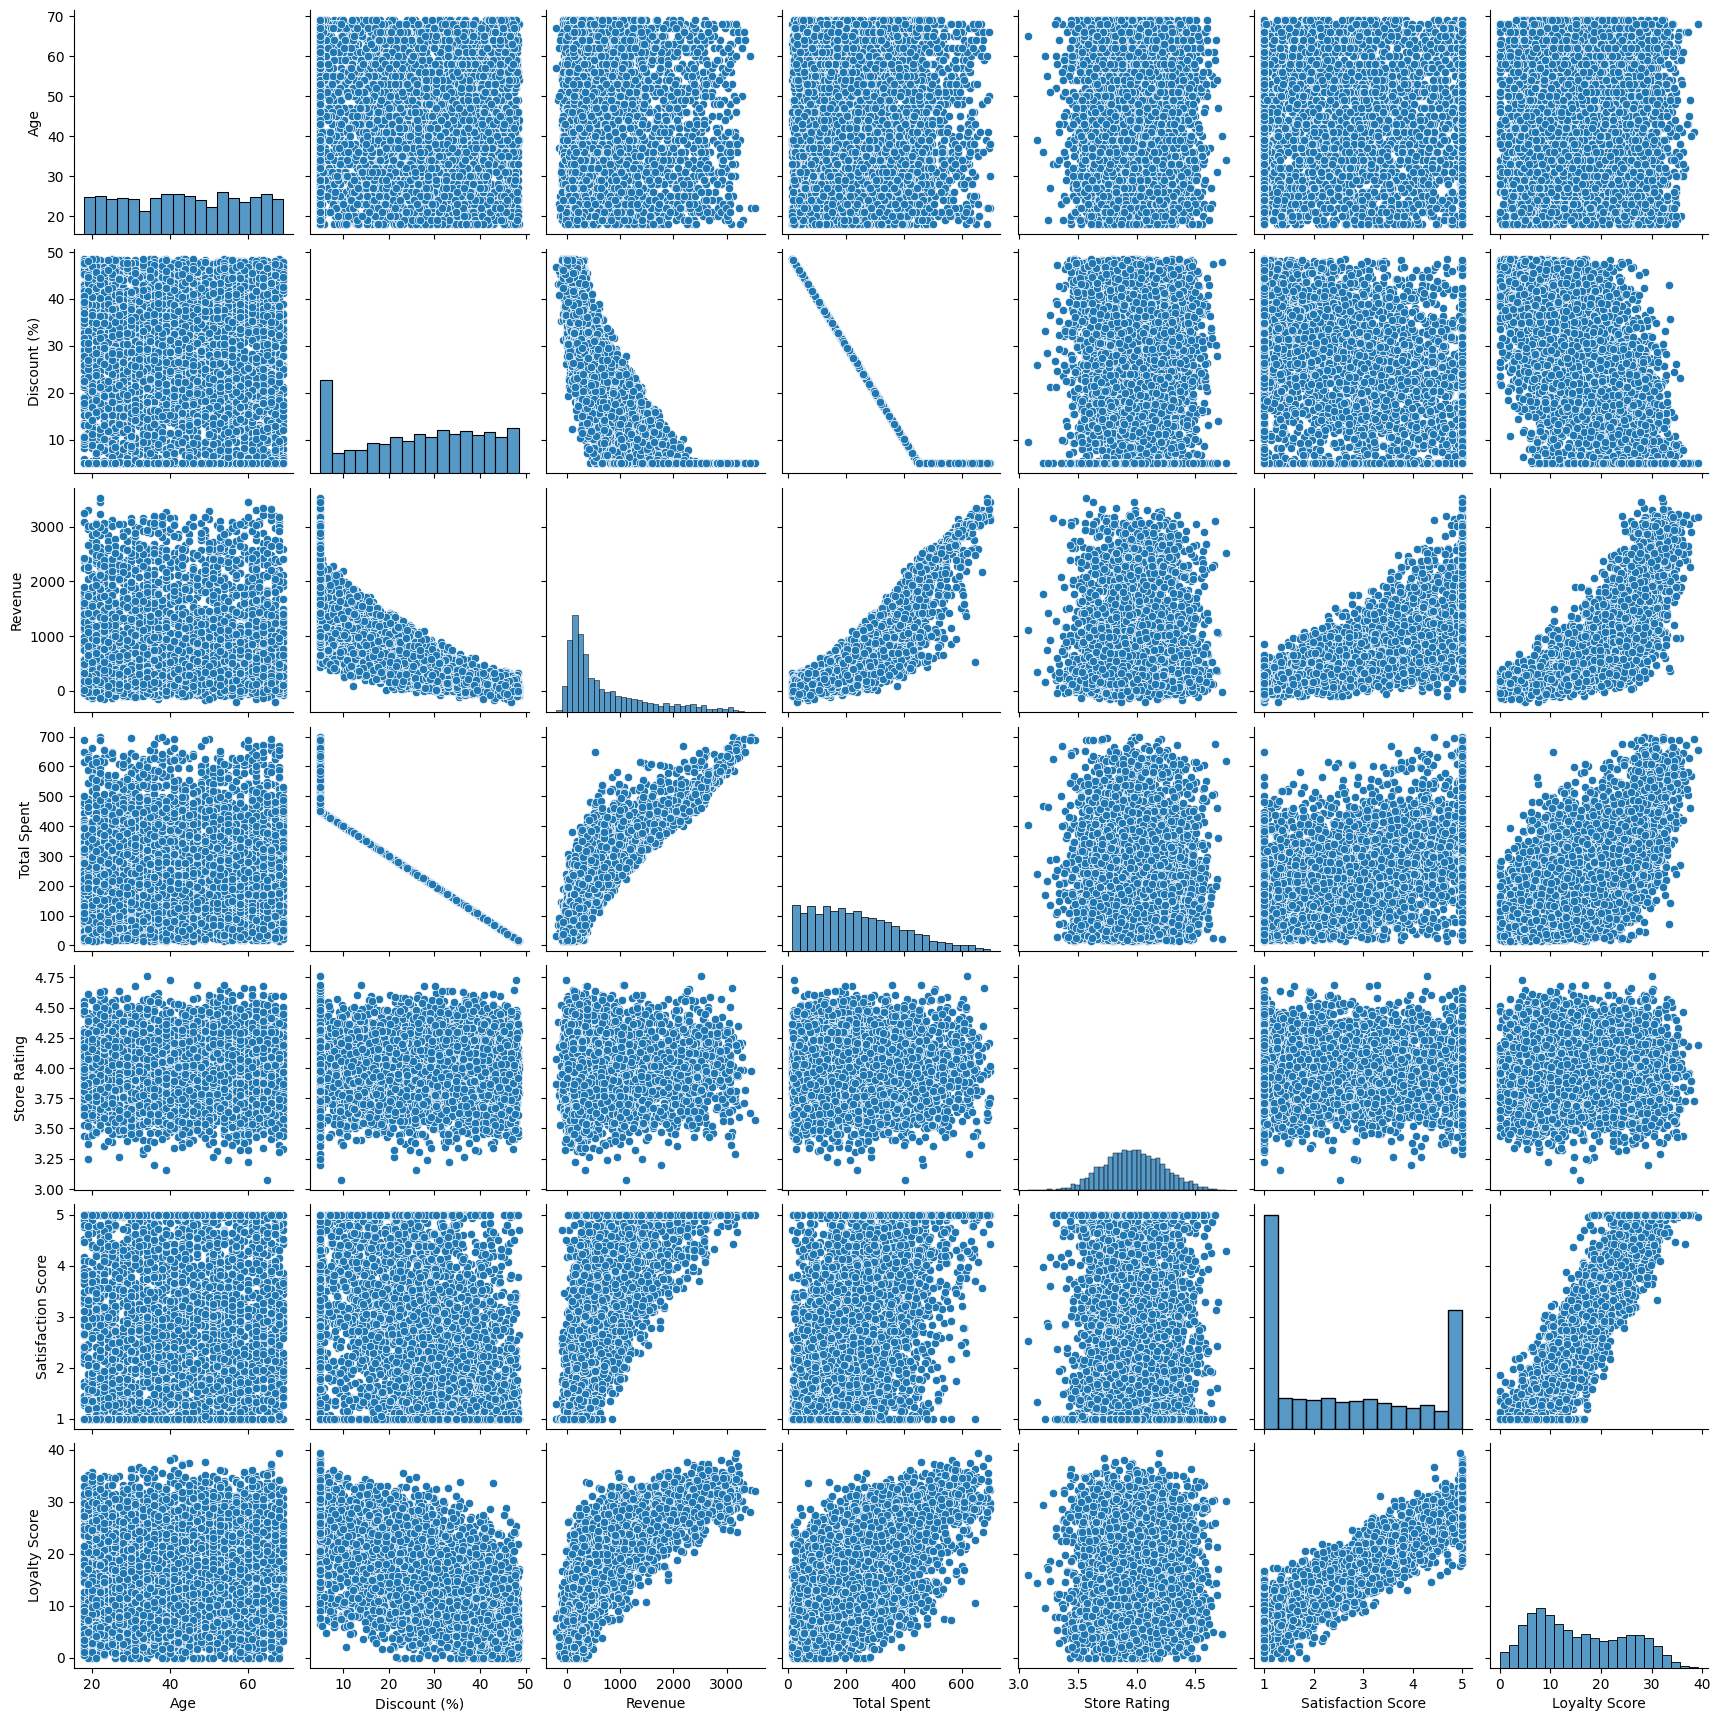

In [28]:
plt.figure(figsize=(12, 6))
sns.pairplot(df[['Age', 'Discount (%)', 'Revenue', 'Total Spent','Store Rating', 'Satisfaction Score', 'Loyalty Score']])
plt.show()



*   **Discount** has  a strong linear relationship with **Total spent**.

*  **Discount** and **revenue** have a linear relationship.

*   **Revenue** and **total spend** have a linear ralationship.

*   'Total spent' and **loyalty score** have a **mild**
  linear relationship.

*   Satisfaction and loyalty scores are linearly correlated.


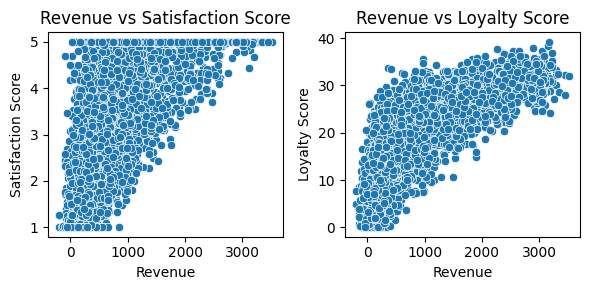

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Scatter Plot: "Revenue" vs "Satisfaction Score"
sns.scatterplot(x='Revenue', y='Satisfaction Score', data=df, ax=axes[0])
axes[0].set_title('Revenue vs Satisfaction Score')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Satisfaction Score')

# Scatter Plot: "Revenue" vs "Loyalty Score"
sns.scatterplot(x='Revenue', y='Loyalty Score', data=df, ax=axes[1])
axes[1].set_title('Revenue vs Loyalty Score')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('Loyalty Score')

plt.tight_layout()
plt.show()



>    **Low revenue** corresponds with **low satisfaction and loyalty scores** and higher revenue customers seem more satisfied and loyal.



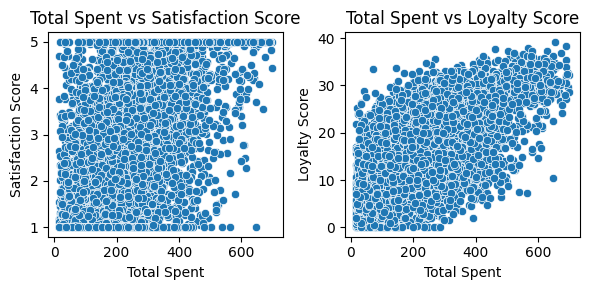

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Scatter Plot: "Total Spent" vs "Satisfaction Score"
sns.scatterplot(x='Total Spent', y='Satisfaction Score', data=df, ax=axes[0])
axes[0].set_title('Total Spent vs Satisfaction Score')
axes[0].set_xlabel('Total Spent')
axes[0].set_ylabel('Satisfaction Score')

# Scatter Plot: "Total Spend" vs "Loyalty Score"
sns.scatterplot(x='Total Spent', y='Loyalty Score', data=df, ax=axes[1])
axes[1].set_title('Total Spent vs Loyalty Score')
axes[1].set_xlabel('Total Spent')
axes[1].set_ylabel('Loyalty Score')

plt.tight_layout()
plt.show()



> Total spent has a mild linear relationship with loyalty score.



# Bar plots

<ipython-input-31-edd089b5dba8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Items Purchased', y='Satisfaction Score', data=df, palette=palette)
<ipython-input-31-edd089b5dba8>:5: UserWarning: The palette list has more values (4978) than needed (14), which may not be intended.
  sns.barplot(x='Items Purchased', y='Satisfaction Score', data=df, palette=palette)


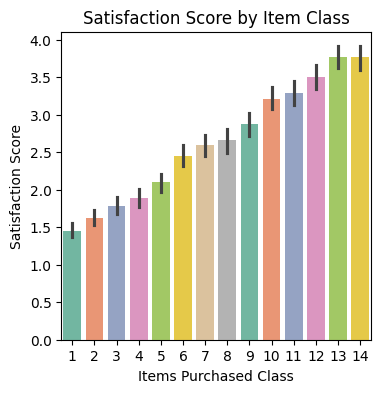

In [31]:
#Bar plot showing relationship of items purchased and Satisfaction scores

palette = sns.color_palette("Set2", len(df))
plt.figure(figsize=(4,4))
sns.barplot(x='Items Purchased', y='Satisfaction Score', data=df, palette=palette)

plt.title('Satisfaction Score by Item Class')
plt.xlabel('Items Purchased Class')
plt.ylabel('Satisfaction Score')
plt.show()



> As number of **items purchased** increase, **Satisfaction score**  increases



<ipython-input-32-5a6247d8acf3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Category', y='Satisfaction Score', data=product_satisfacton, palette=palette)


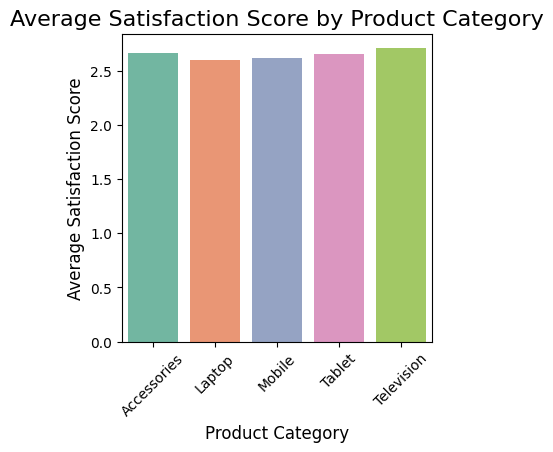

In [32]:
#Bar plot illustrating Product Category and Satisfaction score relationship.

product_satisfacton = df.groupby('Product Category')['Satisfaction Score'].mean().reset_index()
palette = sns.color_palette("Set2", len(product_satisfacton))

plt.figure(figsize=(4,4))
sns.barplot(x='Product Category', y='Satisfaction Score', data=product_satisfacton, palette=palette)

plt.title('Average Satisfaction Score by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Satisfaction Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()



> No significant variations are observable. Even though, comparatively **Laptop and Mobile buyers** seem to have lesser Satisfaction Scores than the other three item buyers.



<ipython-input-33-34379ad97683>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Preferred Visit Time', y='Satisfaction Score', data=Visit_time_satisfaction, palette=palette, ax=axes[0])


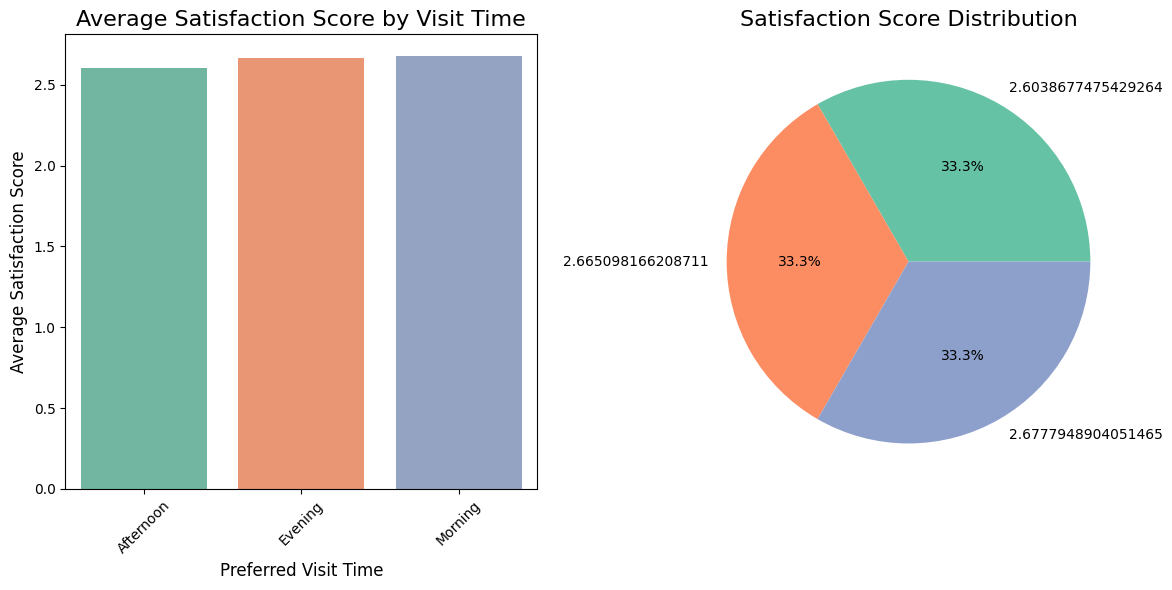

In [33]:
#Bar plot and pie plot depicting visit times trends influence on Satisfaction scores.

Visit_time_satisfaction = df.groupby('Preferred Visit Time')['Satisfaction Score'].mean().reset_index()
palette = sns.color_palette("Set2", len(Visit_time_satisfaction))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x='Preferred Visit Time', y='Satisfaction Score', data=Visit_time_satisfaction, palette=palette, ax=axes[0])
axes[0].set_title('Average Satisfaction Score by Visit Time', fontsize=16)
axes[0].set_xlabel('Preferred Visit Time', fontsize=12)
axes[0].set_ylabel('Average Satisfaction Score', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)


loyalty_counts = Visit_time_satisfaction['Satisfaction Score'].value_counts()
axes[1].pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", len(loyalty_counts)))
axes[1].set_title('Satisfaction Score Distribution', fontsize=16)

plt.tight_layout()
plt.show()



> No distinct patterns are visible. In short, visit times **don't seem to effect** the Satisfaction score much.



<ipython-input-34-79ad7b132257>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Satisfaction Score', data=Gender_Satisfaction, palette=palette, ax=axes[0])


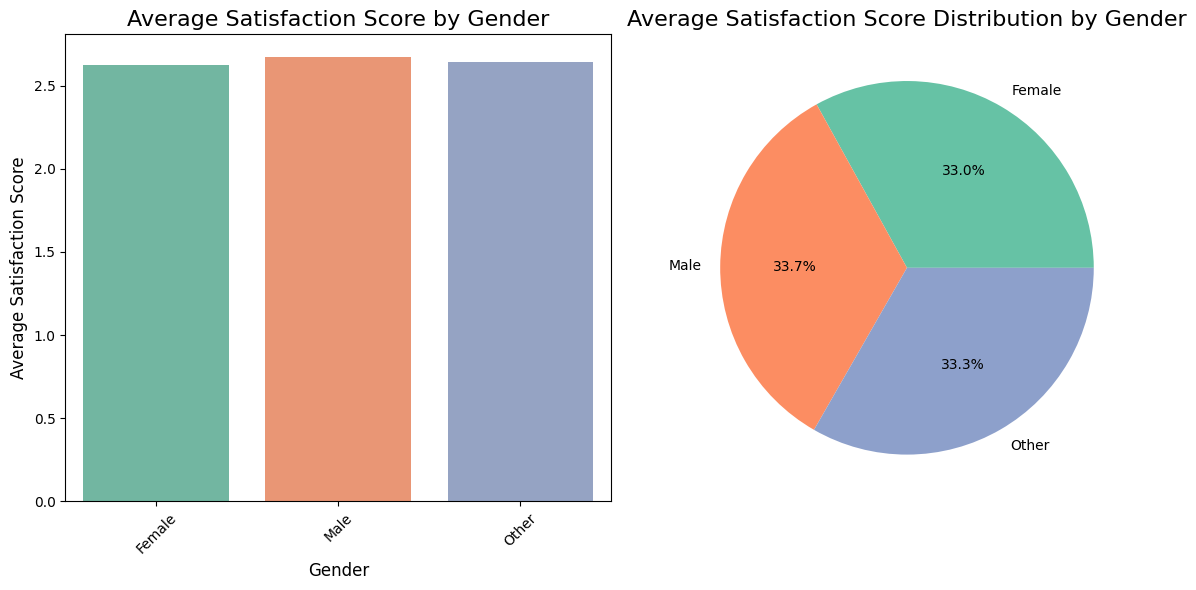

In [34]:
#Checking whether there exist any gender specific trends for Satisfaction scores

Gender_Satisfaction = df.groupby('Gender')['Satisfaction Score'].mean().reset_index()
palette = sns.color_palette("Set2", len(Gender_Satisfaction))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Barplot
sns.barplot(x='Gender', y='Satisfaction Score', data=Gender_Satisfaction, palette=palette, ax=axes[0])
axes[0].set_title('Average Satisfaction Score by Gender', fontsize=16)
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Average Satisfaction Score', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
Gender_Satisfaction['Satisfaction Score'] = Gender_Satisfaction['Satisfaction Score'].round(2)
axes[1].pie(Gender_Satisfaction['Satisfaction Score'], labels=Gender_Satisfaction['Gender'], autopct='%1.1f%%', colors=palette)
axes[1].set_title('Average Satisfaction Score Distribution by Gender', fontsize=16)

plt.tight_layout()
plt.show()

No significant trends are visible; though comparativelty **women** have low satisfaction scores.

<ipython-input-35-bb0a39f32f60>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Warranty Extension', y='Satisfaction Score', data=Warrenty_satisfaction, palette=palette)


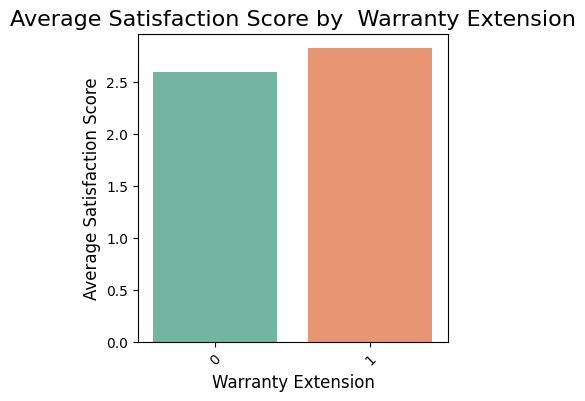

In [35]:
#Warranty Extension and Satisfaction warranty extension_ bar plot

Warrenty_satisfaction = df.groupby('Warranty Extension')['Satisfaction Score'].mean().reset_index()
palette = sns.color_palette("Set2", len(Warrenty_satisfaction))

plt.figure(figsize=(4,4))
sns.barplot(x='Warranty Extension', y='Satisfaction Score', data=Warrenty_satisfaction, palette=palette)

plt.title('Average Satisfaction Score by  Warranty Extension', fontsize=16)
plt.xlabel('Warranty Extension', fontsize=12)
plt.ylabel('Average Satisfaction Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()



> Those who **have a warranty extension** are **more satisfied** than those who haven't had an extension.



<ipython-input-36-dcccd83bffed>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment Method', y='Satisfaction Score', data=pay_option_satisfaction, palette=palette)


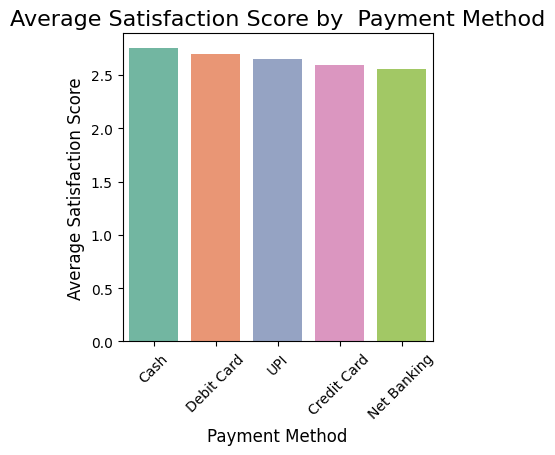

In [36]:
#Payment Method and Satisfaction pay_option bar plot

pay_option_satisfaction = df.groupby('Payment Method')['Satisfaction Score'].mean().reset_index()
pay_option_satisfaction = pay_option_satisfaction.sort_values(by='Satisfaction Score', ascending=False)
palette = sns.color_palette("Set2", len(pay_option_satisfaction))

plt.figure(figsize=(4,4))
sns.barplot(x='Payment Method', y='Satisfaction Score', data=pay_option_satisfaction, palette=palette)

plt.title('Average Satisfaction Score by  Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Average Satisfaction Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()

No significant influence is evident; though customers who use **cash and debit card** seem to have high Satisfaction scores.

<ipython-input-37-d71f3948e740>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Membership Status', y='Satisfaction Score', data=Membership_Satisfaction, palette=palette)


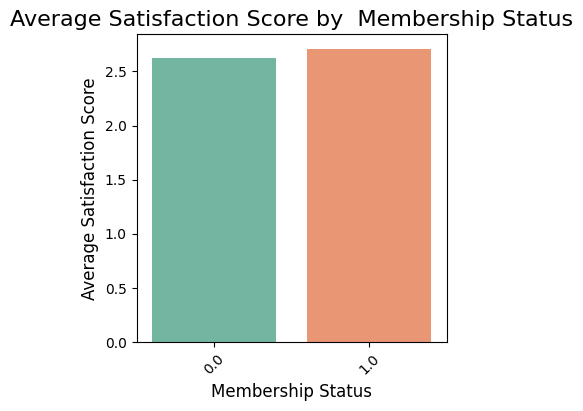

In [37]:
#Membership status and Satisfaction scores_ bar plot

Membership_Satisfaction = df.groupby('Membership Status')['Satisfaction Score'].mean().reset_index()
palette = sns.color_palette("Set2", len(Membership_Satisfaction))

plt.figure(figsize=(4,4))
sns.barplot(x='Membership Status', y='Satisfaction Score', data=Membership_Satisfaction, palette=palette)

plt.title('Average Satisfaction Score by  Membership Status', fontsize=16)
plt.xlabel('Membership Status', fontsize=12)
plt.ylabel('Average Satisfaction Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Those who have a membership seem more satisfied.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615:

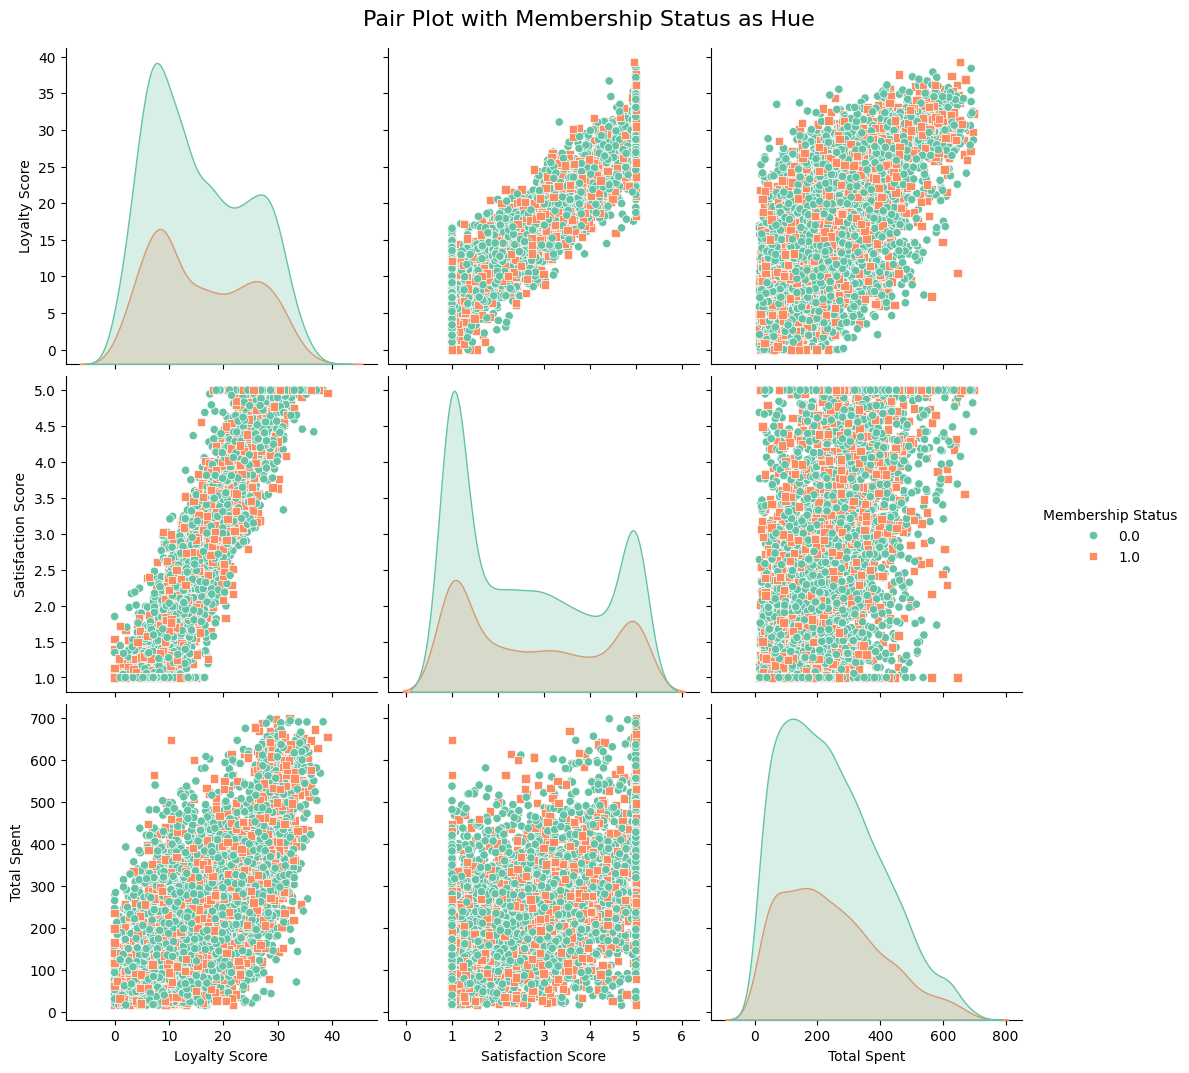

In [38]:
#Pairplot with hue as membership status

columns_to_plot = ['Loyalty Score', 'Satisfaction Score', 'Total Spent']
categorical_hue = 'Membership Status'
df[categorical_hue] = df[categorical_hue].astype('category')

sns.pairplot(
    df,
    vars=columns_to_plot,
    hue=categorical_hue,
    palette='Set2',
    diag_kind='kde',
    markers=['o', 's', 'D'],
    height=3.5
)

plt.suptitle('Pair Plot with Membership Status as Hue', y=1.02, fontsize=16)
plt.show()

No distinct difference is seen for membres and non members. Though members have a slight higher loyalty and satisfaction scores.

<ipython-input-39-93e0faa597da>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Satisfaction Score', data=Region_Satisfaction, palette=palette)


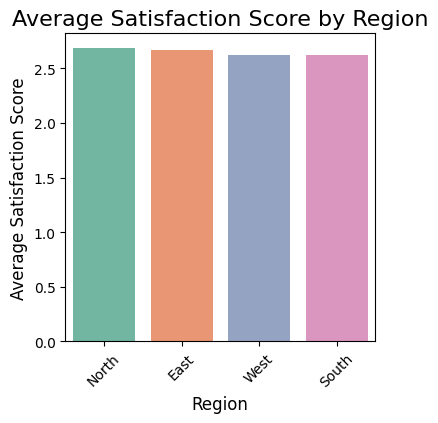

In [39]:
# analysing customers region and their Satisfaction

Region_Satisfaction = df.groupby('Region')['Satisfaction Score'].mean().reset_index()
Region_Satisfaction = Region_Satisfaction.sort_values(by='Satisfaction Score', ascending=False)
palette = sns.color_palette("Set2", len(Region_Satisfaction))

plt.figure(figsize=(4,4))
sns.barplot(x='Region', y='Satisfaction Score', data=Region_Satisfaction, palette=palette)

plt.title('Average Satisfaction Score by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Satisfaction Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()

No major differences are observable. Yet people from **North** are comparatively **more satisfied** ; while, customers from  **south** tend to be less satisfied.

In [40]:
df['Product Category'].value_counts(ascending=False)

Product Category
Accessories    1011
Laptop         1006
Tablet          995
Television      985
Mobile          981
Name: count, dtype: int64

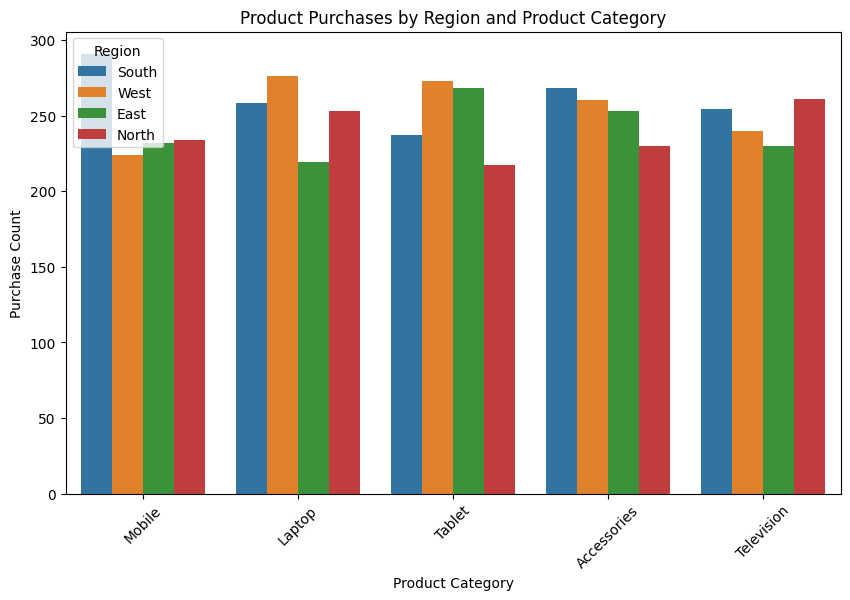

In [41]:
# Influence of Region and product category on the sales count

region_product_data = df.groupby(['Region', 'Product Category']).size().reset_index(name='Purchase Count')
region_product_data = region_product_data.sort_values(by='Purchase Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Purchase Count', hue='Region', data=region_product_data)
plt.title('Product Purchases by Region and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)
plt.show()



*   Mobile phones are the most purchased item and higher number of purchases came from the south.
*   Though, in general mobile phone is the least bought item.
*   Individual minimum is for Tablet by customers from North.


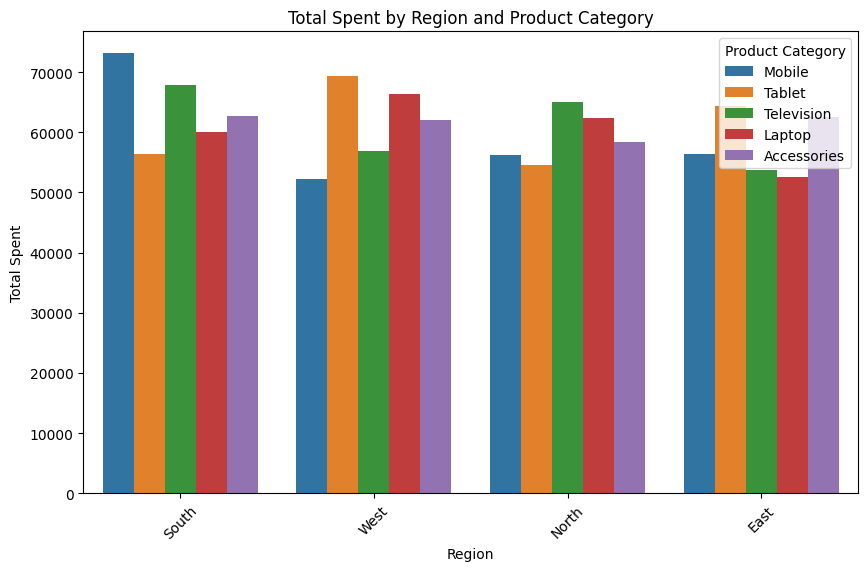

In [42]:
# Region and total spending

region_Spent_data = df.groupby(['Region', 'Product Category'])['Total Spent'].sum().reset_index(name='Total Spent')
region_Spent_data = region_Spent_data.sort_values(by='Total Spent', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Total Spent', hue='Product Category', data=region_Spent_data)
plt.title('Total Spent by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.show()




> Customers from south spent the most, which was on mobile phones.



In [43]:
segmentation = df.groupby(['Region', 'Product Category']).agg(
    avg_satisfaction_score=('Satisfaction Score', 'mean'),
    avg_loyalty_score=('Loyalty Score', 'mean'),
    total_spent=('Total Spent', 'sum'),
    avg_discount=('Discount (%)', 'mean'),
    total_items_purchased=('Items Purchased', 'sum')
).reset_index()
segmentation = segmentation.sort_values(by='avg_loyalty_score', ascending=False)

print(segmentation)

   Region Product Category  avg_satisfaction_score  avg_loyalty_score  \
14  South       Television                2.786486          16.665107   
0    East      Accessories                2.743164          16.573839   
8   North           Tablet                2.753543          16.379996   
19   West       Television                2.773497          16.056877   
5   North      Accessories                2.684178          16.037103   
1    East           Laptop                2.727230          15.875504   
7   North           Mobile                2.677596          15.832354   
9   North       Television                2.661867          15.808625   
18   West           Tablet                2.623977          15.751097   
3    East           Tablet                2.634932          15.600732   
13  South           Tablet                2.634904          15.472861   
6   North           Laptop                2.663924          15.413005   
10  South      Accessories                2.628371 

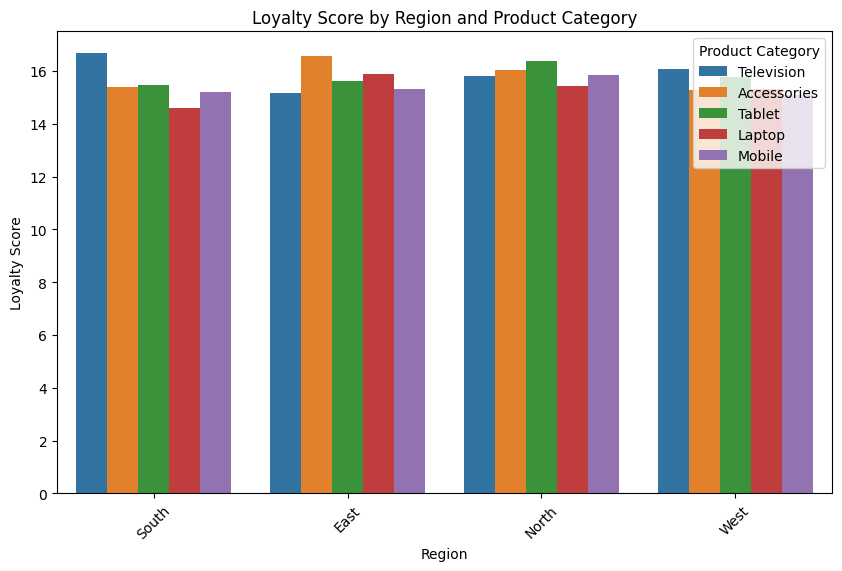

In [44]:
region_loyalty_data = df.groupby(['Region', 'Product Category'])['Loyalty Score'].mean().reset_index(name='Loyalty Score')
region_loyalty_data = region_loyalty_data.sort_values(by='Loyalty Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Loyalty Score', hue='Product Category', data=region_loyalty_data)
plt.title('Loyalty Score by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Loyalty Score')
plt.xticks(rotation=45)
plt.show()

For **each unique combination** of Region and Product Category, the mean Loyalty Score is calculated.
The plot provides insights into how Loyalty Score varies across both regions and product categories.


*   For this case south comes first with customers who bought television.(This specific combination)
*   But in a broader perspective, when we consider region only, north tops the list.



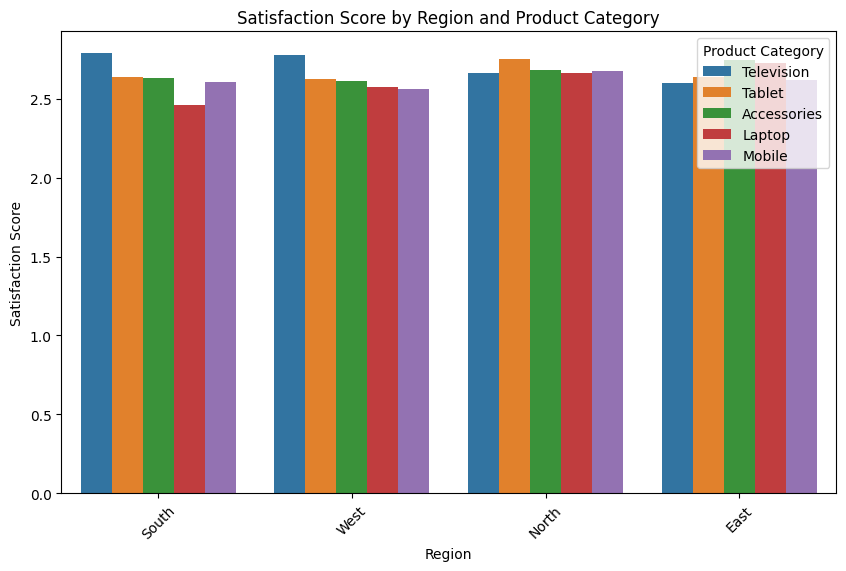

In [45]:
region_Satisfaction_data = df.groupby(['Region', 'Product Category'])['Satisfaction Score'].mean().reset_index(name='Satisfaction Score')
region_Satisfaction_data = region_Satisfaction_data.sort_values(by='Satisfaction Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Satisfaction Score', hue='Product Category', data=region_Satisfaction_data)
plt.title('Satisfaction Score by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=45)
plt.show()

* In general, no significant differences are observable in the Satisfaction levels of western and northern people except for TV purchase and Tablet purchase respectively.  

*   Southern and western people were more satisfied with Television purchases while people from North were satisfied more about their tablet purchase.
*   On the other hand, customers from east were satisfied more about their accessories and laptop purchase.

*   Least of all satisfied were the customers who were from south and bought laptop followed by Eastern people who bought Television.






# Box plots and Outliers

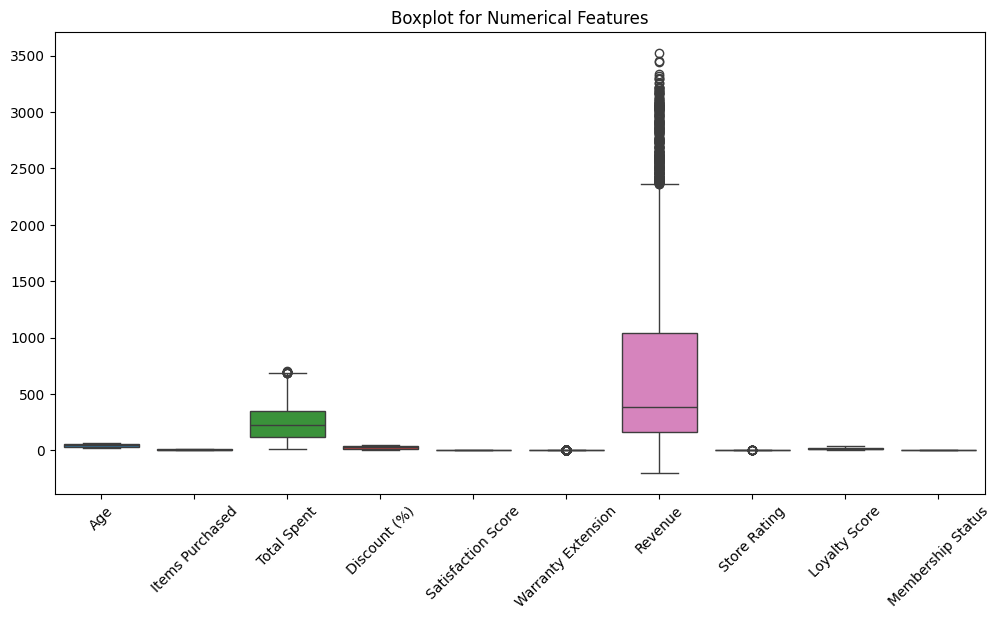

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(data=num_df)
plt.title('Boxplot for Numerical Features')
plt.xticks(rotation=45)
plt.show()

Outliers are present in columns such as Total spent and Revenue.

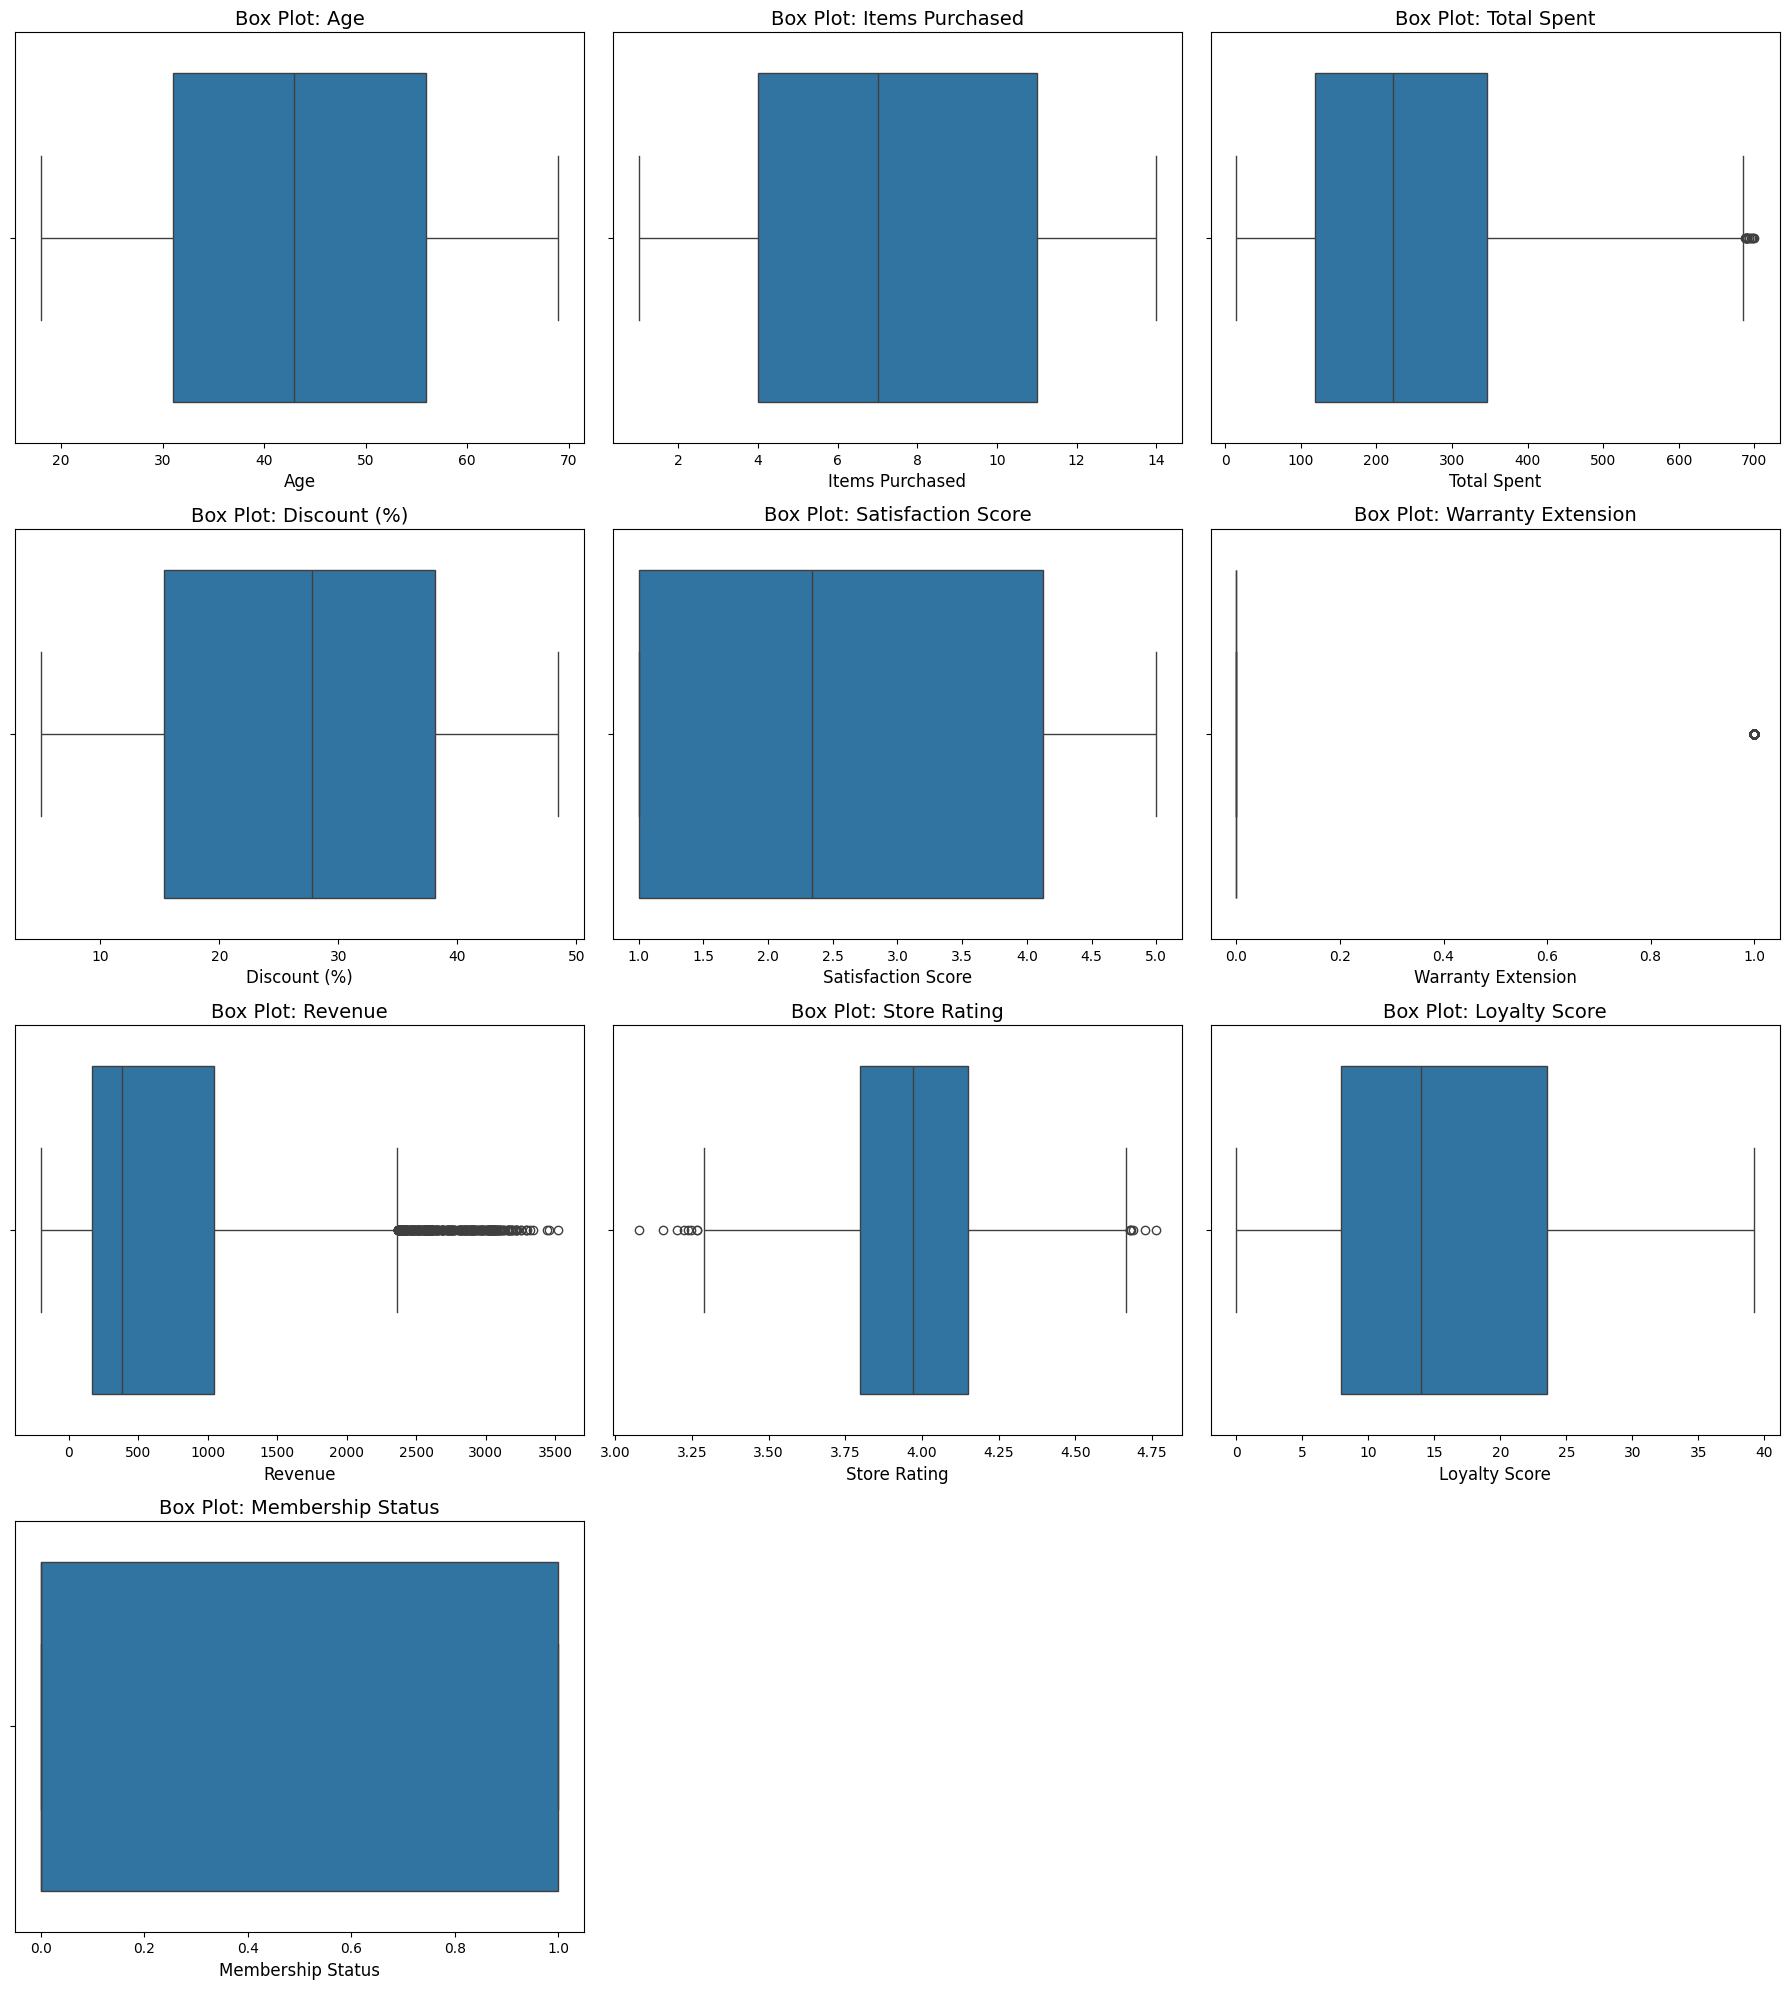

In [47]:
numerical_columns = num_df.select_dtypes(include=['float64', 'int64']).columns
n_cols = 3
n_rows = (len(numerical_columns) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=num_df[col])
    plt.title(f'Box Plot: {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()


In [48]:
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR)))

for column in num_df.columns:
    outliers = num_df[column][outliers_iqr[column]]
    if not outliers.empty:
        print(f"Outliers in '{column}':")
        print(outliers)
        print("\n")


Outliers in 'Total Spent':
205     693.419051
385     690.202677
432     695.414941
556     690.572975
786     696.487744
796     699.611576
949     689.148310
2131    688.278383
2319    688.249877
2502    697.846059
2930    690.430691
3155    693.135870
4500    687.275300
Name: Total Spent, dtype: float64


Outliers in 'Warranty Extension':
0       1
1       1
2       1
7       1
15      1
       ..
4967    1
4971    1
4988    1
4994    1
4998    1
Name: Warranty Extension, Length: 1093, dtype: int64


Outliers in 'Revenue':
4       2463.590392
6       2402.374713
25      2551.922888
46      2593.131497
60      3061.789585
           ...     
4903    3010.908777
4939    2581.666306
4952    2881.418903
4964    2520.103926
4979    2615.523036
Name: Revenue, Length: 305, dtype: float64


Outliers in 'Store Rating':
9       4.728713
904     3.266378
1429    4.680038
1488    3.224888
3021    3.155624
3151    3.076092
3650    3.202019
3727    4.764298
3945    3.266717
4186    4.689149
4273 



> All the outliers present here seem to be **genuine**. Therefore, **not** going to **remove** them.



# Heat map of Correlation matrix

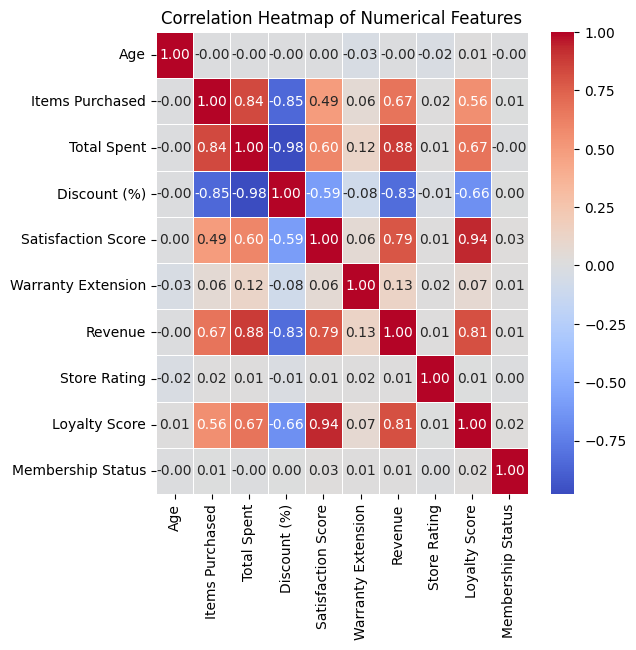

In [49]:
correlation_matrix = num_df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [50]:
target_column = 'Satisfaction Score'
correlation_with_target = num_df.corr()[target_column]

sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)
print("Correlation of all features with Satisfaction Score (ascending order):\n")
print(sorted_correlation)


Correlation of all features with Satisfaction Score (ascending order):

Satisfaction Score    1.000000
Loyalty Score         0.935279
Revenue               0.786208
Total Spent           0.596642
Discount (%)          0.588896
Items Purchased       0.494188
Warranty Extension    0.061764
Membership Status     0.025267
Store Rating          0.010535
Age                   0.001343
Name: Satisfaction Score, dtype: float64




> Loyalty Score, Revenue, Total Spent, Discount, Items Purchased are the highly correlated (numerical) with the target variable.


> Store Rating and Age are comparatively less correlated.






# Feature Engineering

In [51]:
df['Spent per Item'] = df['Total Spent'] / df['Items Purchased']

In [52]:
df['Spent per Item'].value_counts(ascending=False)

Spent per Item
29.226195    1
24.279314    1
40.612163    1
23.834483    1
19.863597    1
            ..
30.340451    1
26.644156    1
30.750848    1
15.835947    1
33.328534    1
Name: count, Length: 4978, dtype: int64

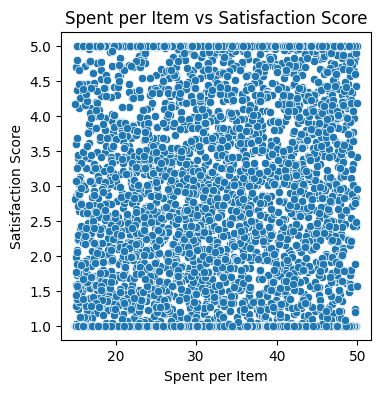

In [53]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='Spent per Item', y='Satisfaction Score', data=df)
plt.title('Spent per Item vs Satisfaction Score')
plt.xlabel('Spent per Item')
plt.ylabel('Satisfaction Score')
plt.show()



> No distinct trend is seen for total spent and Satisfaction score in scatter plot.



In [54]:
df['Net Revenue'] = df['Total Spent'] - (df['Total Spent'] * df['Discount (%)'] / 100)

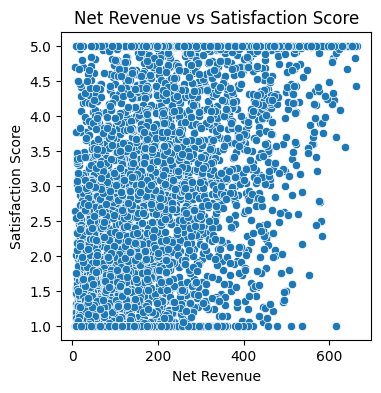

In [55]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='Net Revenue', y='Satisfaction Score', data=df)
plt.title('Net Revenue vs Satisfaction Score')
plt.xlabel('Net Revenue')
plt.ylabel('Satisfaction Score')
plt.show()

In [56]:
df['Store Rating Impact'] = df['Store Rating'] * df['Satisfaction Score']

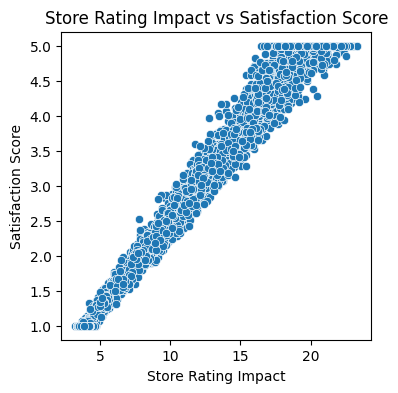

In [57]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='Store Rating Impact', y='Satisfaction Score', data=df)
plt.title('Store Rating Impact vs Satisfaction Score')
plt.xlabel('Store Rating Impact')
plt.ylabel('Satisfaction Score')
plt.show()

Store rating impact has a strong linear relationship with satisfaction score.

In [58]:
df['Satisfaction Weighted Spending'] = df['Satisfaction Score'] * df['Total Spent']

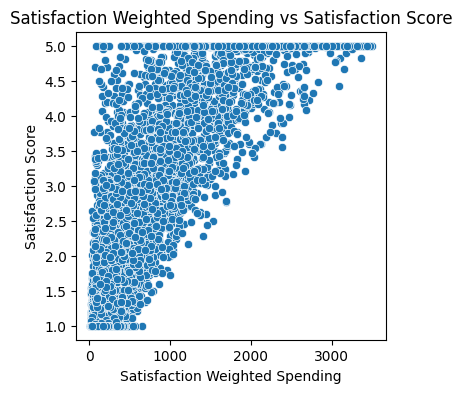

In [59]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='Satisfaction Weighted Spending', y='Satisfaction Score', data=df)
plt.title('Satisfaction Weighted Spending vs Satisfaction Score')
plt.xlabel('Satisfaction Weighted Spending')
plt.ylabel('Satisfaction Score')
plt.show()

In [60]:
# df=df.drop(['Store Rating', 'Satisfaction Score', 'Total Spent','Discount (%)','Items Purchased','Revenue'],axis=1)

In [61]:
# df=df.drop(['Net Revenue','Store Rating Impact','Satisfaction Weighted Spending','Spent per Item'],axis=1)

In [62]:
# df=df.drop(['Total Spent','Items Purchased'],axis=1)

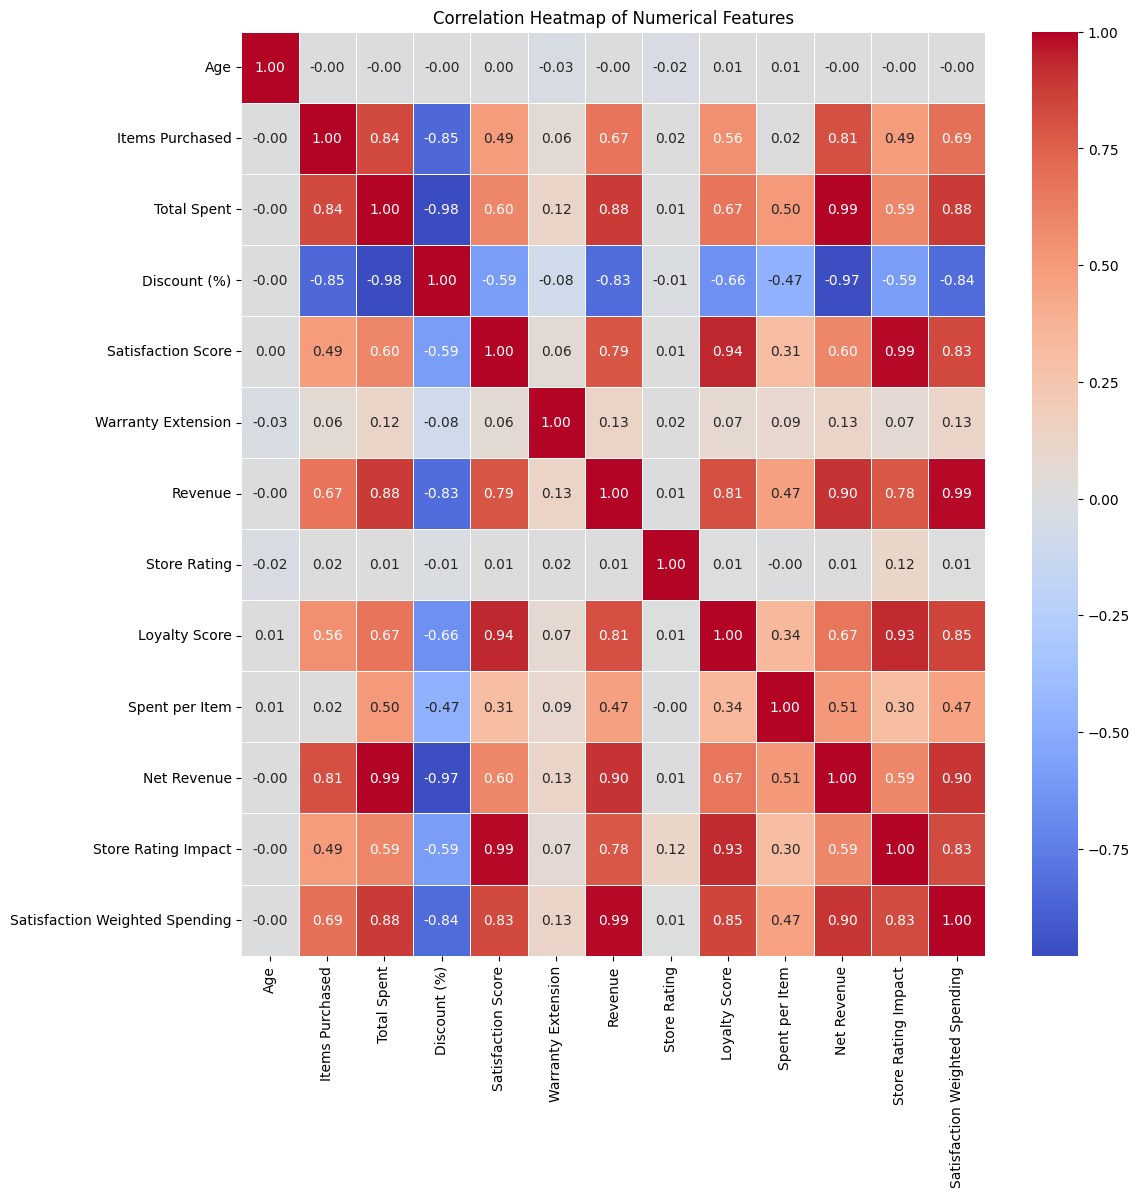

In [63]:
correlation_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [64]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4978 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                4978 non-null   object
 1   Region                4978 non-null   object
 2   Product Category      4978 non-null   object
 3   Payment Method        4978 non-null   object
 4   Preferred Visit Time  4978 non-null   object
dtypes: object(5)
memory usage: 233.3+ KB


# Encoding

**One-Hot Encoding**

In [65]:
cat_df=df.select_dtypes(include=['object'])
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4978 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                4978 non-null   object
 1   Region                4978 non-null   object
 2   Product Category      4978 non-null   object
 3   Payment Method        4978 non-null   object
 4   Preferred Visit Time  4978 non-null   object
dtypes: object(5)
memory usage: 233.3+ KB


In [66]:
encoded_df=pd.get_dummies(cat_df).astype(int)
encoded_df

Gender_Female  Gender_Male  Gender_Other  Region_East  Region_North  \
0                 0            1             0            0             0   
1                 1            0             0            0             0   
2                 0            1             0            1             0   
3                 1            0             0            1             0   
4                 1            0             0            0             0   
...             ...          ...           ...          ...           ...   
4995              0            1             0            0             0   
4996              0            1             0            1             0   
4997              0            1             0            0             1   
4998              1            0             0            0             0   
4999              1            0             0            0             0   

      Region_South  Region_West  Product Category_Accessories  \
0                1            0                             1   
1                1            0                             1   
2                0            0                             0   
3                0            0                             0   
4                1            0                             0   
...            ...          ...                           ...   
4995             0            1                             0   
4996             0            0                             1   
4997             0            0                             0   
4998             0            1                             1   
4999             1            0                             1   

      Product Category_Laptop  Product Category_Mobile  \
0                           0                        0   
1                           0                        0   
2                           1                        0   
3                           0                        0   
4                           0                        0   
...                       ...                      ...   
4995                        0                        0   
4996                        0                        0   
4997                        0                        0   
4998                        0                        0   
4999                        0                        0   

      Product Category_Tablet  Product Category_Television  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           1                            0   
4                           1                            0   
...                       ...                          ...   
4995                        0                            1   
4996                        0                            0   
4997                        0                            1   
4998                        0                            0   
4999                        0                            0   

      Payment Method_Cash  Payment Method_Credit Card  \
0                       0                           0   
1                       1                           0   
2                       0                           1   
3                       0                           0   
4                       0                           0   
...                   ...                         ...   
4995                    0                           1   
4996                    0                           0   
4997                    0                           0   
4998                    0                           0   
4999                    0                           0   

      Payment Method_Debit Card  Payment Method_Net Banking  \
0                             0                           0   
1                             0                

In [67]:
df['Membership Status'].dtype

CategoricalDtype(categories=[0.0, 1.0], ordered=False, categories_dtype=float64)

In [68]:
df['Membership Status']=df['Membership Status'].astype(int)

In [69]:
df.drop(cat_df,axis=1,inplace=True)

In [70]:
df = pd.concat([df, encoded_df], axis=1)
df.head()

Age  Items Purchased  Total Spent  Discount (%)  Satisfaction Score  \
0   56                1    29.226195     47.077380            1.000000   
1   69               10   420.142612      7.985739            3.760294   
2   46                4   127.742817     37.225718            1.771240   
3   32                9   417.722683      8.227732            1.926831   
4   60               13   608.031366      5.000000            3.902927   

   Warranty Extension      Revenue  Store Rating  Loyalty Score  \
0                   1   149.252145      3.660461       3.597133   
1                   1  1485.524222      3.551553      25.764903   
2                   1    85.550131      3.922839       7.022399   
3                   0   824.118724      3.860422       7.635412   
4                   0  2463.590392      3.812820      29.461119   

   Membership Status  ...  Product Category_Tablet  \
0                  1  ...                        0   
1                  1  ...                        0   
2                  1  ...                        0   
3                  1  ...                        1   
4                  0  ...                        1   

   Product Category_Television  Payment Method_Cash  \
0                            0                    0   
1                            0                    1   
2                            0                    0   
3                            0                    0   
4                            0                    0   

   Payment Method_Credit Card  Payment Method_Debit Card  \
0                           0                          0   
1                           0                          0   
2                           1                          0   
3                           0                          0   
4                           0                          0   

   Payment Method_Net Banking  Payment Method_UPI  \
0                           0                   1   
1                           0                   0   
2                           0                   0   
3                           0                   1   
4                           0                   1   

   Preferred Visit Time_Afternoon  Preferred Visit Time_Evening  \
0                               0                             1   
1                               0                             1   
2                               0                             0   
3                               1                             0   
4                               0                             0   

   Preferred Visit Time_Morning  
0                             0  
1                             0  
2                             1  
3                             0  
4                             1  

[5 rows x 34 columns]

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4978 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             4978 non-null   int64  
 1   Items Purchased                 4978 non-null   int64  
 2   Total Spent                     4978 non-null   float64
 3   Discount (%)                    4978 non-null   float64
 4   Satisfaction Score              4978 non-null   float64
 5   Warranty Extension              4978 non-null   int64  
 6   Revenue                         4978 non-null   float64
 7   Store Rating                    4978 non-null   float64
 8   Loyalty Score                   4978 non-null   float64
 9   Membership Status               4978 non-null   int64  
 10  Spent per Item                  4978 non-null   float64
 11  Net Revenue                     4978 non-null   float64
 12  Store Rating Impact             4978 no

# Scaling

In [72]:
x=df.drop('Satisfaction Score',axis=1)
y=df['Satisfaction Score'] #target column

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [74]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=5)
# X_pca = pca.fit_transform(X_scaled)

# # Check how much variance is explained by each component
# print(f"Explained Variance by each component: {pca.explained_variance_ratio_}")
# print(f"Total variance explained by the selected components: {sum(pca.explained_variance_ratio_)}")

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)

# Baseline models without feature selection.


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Absolute Error (MAE): 0.0685
Mean Squared Error (MSE): 0.0085
Root Mean Squared Error (RMSE): 0.0923
R² Score: 0.9963


In [77]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ridge_model = Ridge(alpha=12.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Absolute Error (MAE): 0.0703
Mean Squared Error (MSE): 0.0087
Root Mean Squared Error (RMSE): 0.0933
R² Score: 0.9962


In [78]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=1.0, random_state=42)
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Absolute Error (MAE): 0.1324
Mean Squared Error (MSE): 0.0286
Root Mean Squared Error (RMSE): 0.1692
R² Score: 0.9875


In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Absolute Error (MAE): 0.0242
Mean Squared Error (MSE): 0.0020
Root Mean Squared Error (RMSE): 0.0452
R² Score: 0.9991


**Random Forest Regressor**

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Absolute Error (MAE): 0.0122
Mean Squared Error (MSE): 0.0005
Root Mean Squared Error (RMSE): 0.0224
R² Score: 0.9998


In [81]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Absolute Error (MAE): 0.0853
Mean Squared Error (MSE): 0.0124
Root Mean Squared Error (RMSE): 0.1113
R² Score: 0.9946


In [82]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')


Mean Absolute Error (MAE): 0.0165
Mean Squared Error (MSE): 0.0007
Root Mean Squared Error (RMSE): 0.0272
R² Score: 0.9997


In [83]:
#Overfitting Check.
train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"Training MSE: {train_mse}, \tTraining R²: {train_r2}")
print(f"\nTesting MSE: {test_mse}, \tTesting R²: {test_r2}")

Training MSE: 0.00012817847019299687, 	Training R²: 0.9999457565296741

Testing MSE: 0.0005013802983043133, 	Testing R²: 0.999781516576679





*   
> **Random Forest** has higher performance matrices of all the models tested.
*> Traing and test performances verify that overfitting hasn't occured.









# Feature selection

**Variance Threshold**

In [84]:
x.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Warranty Extension', 'Revenue', 'Store Rating', 'Loyalty Score',
       'Membership Status', 'Spent per Item', 'Net Revenue',
       'Store Rating Impact', 'Satisfaction Weighted Spending',
       'Gender_Female', 'Gender_Male', 'Gender_Other', 'Region_East',
       'Region_North', 'Region_South', 'Region_West',
       'Product Category_Accessories', 'Product Category_Laptop',
       'Product Category_Mobile', 'Product Category_Tablet',
       'Product Category_Television', 'Payment Method_Cash',
       'Payment Method_Credit Card', 'Payment Method_Debit Card',
       'Payment Method_Net Banking', 'Payment Method_UPI',
       'Preferred Visit Time_Afternoon', 'Preferred Visit Time_Evening',
       'Preferred Visit Time_Morning'],
      dtype='object')

In [85]:
X_train.var(axis=0)

array([1.00278282, 0.99511124, 1.00117354, 1.0046872 , 0.98649389,
       1.00363718, 1.01500478, 0.99955598, 0.9976979 , 1.00277536,
       1.00178183, 1.00694885, 1.0046454 , 0.99959021, 1.00014519,
       0.99477862, 1.00035198, 1.01983463, 0.9942544 , 0.98743701,
       0.99471803, 0.99000837, 1.00602183, 1.00758995, 1.00198612,
       1.00794708, 0.99654345, 1.00394886, 0.99145171, 1.00047766,
       1.00782427, 0.99334853, 0.99863949])

Since all features have somewhat similar values and are 1 or approximately 1 and not 0, no need of elimination.

In [86]:
#checking multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

feature_names = x.columns
X = pd.DataFrame(X_train, columns=feature_names)


vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                           Feature         VIF
0                              Age    1.008087
1                  Items Purchased   20.824859
2                      Total Spent  303.841696
3                     Discount (%)   39.567513
4               Warranty Extension    1.045989
5                          Revenue   59.255732
6                     Store Rating    1.751569
7                    Loyalty Score    9.206719
8                Membership Status    1.004391
9                   Spent per Item    6.612953
10                     Net Revenue  214.926311
11             Store Rating Impact   13.636318
12  Satisfaction Weighted Spending   89.700399
13                   Gender_Female         inf
14                     Gender_Male         inf
15                    Gender_Other         inf
16                     Region_East         inf
17                    Region_North         inf
18                    Region_South         inf
19                     Region_West         inf
20    Product


> Multicollinearity exists. Inf value in one hot encoded columns indicate perfect correlation since they are derived of a single column and represent same information.



> Since **Random forest handles multicollinearity** no need to remove them.



**K-best features method**

In [87]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


rf_model = RandomForestRegressor(random_state=42)
r2_scores = []

for k in range(1, len(x.columns) + 1):
    selector = SelectKBest(score_func=mutual_info_regression, k=k)

    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    rf_model=RandomForestRegressor(random_state=42)
    rf_model.fit(X_train_selected, y_train)
    y_pred = rf_model.predict(X_test_selected)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'R² Score: {r2:.4f}')

    r2_scores.append(r2)

    print(f'\n R² Score with {k} features: {r2:.4f}')


Mean Absolute Error (MAE): 0.1086
Mean Squared Error (MSE): 0.0329
Root Mean Squared Error (RMSE): 0.1813
R² Score: 0.9857

 R² Score with 1 features: 0.9857
Mean Absolute Error (MAE): 0.0929
Mean Squared Error (MSE): 0.0228
Root Mean Squared Error (RMSE): 0.1508
R² Score: 0.9901

 R² Score with 2 features: 0.9901
Mean Absolute Error (MAE): 0.0913
Mean Squared Error (MSE): 0.0212
Root Mean Squared Error (RMSE): 0.1456
R² Score: 0.9908

 R² Score with 3 features: 0.9908
Mean Absolute Error (MAE): 0.0906
Mean Squared Error (MSE): 0.0207
Root Mean Squared Error (RMSE): 0.1438
R² Score: 0.9910

 R² Score with 4 features: 0.9910
Mean Absolute Error (MAE): 0.0836
Mean Squared Error (MSE): 0.0179
Root Mean Squared Error (RMSE): 0.1339
R² Score: 0.9922

 R² Score with 5 features: 0.9922
Mean Absolute Error (MAE): 0.0835
Mean Squared Error (MSE): 0.0180
Root Mean Squared Error (RMSE): 0.1341
R² Score: 0.9922

 R² Score with 6 features: 0.9922
Mean Absolute Error (MAE): 0.0834
Mean Squared Error

In [88]:
best_k = 31
selector = SelectKBest(score_func=mutual_info_regression, k=best_k)
X_train_selected = selector.fit_transform(X_train, y_train)

selected_feature_mask = selector.get_support()
selected_features =  x.columns[selected_feature_mask]
print(f'Selected Features with {best_k} features: {selected_features}\n')

rf_model.fit(X_train_selected, y_train)
X_test_selected = selector.transform(X_test)
y_pred = rf_model.predict(X_test_selected)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

Selected Features with 31 features: Index(['Items Purchased', 'Total Spent', 'Discount (%)', 'Warranty Extension',
       'Revenue', 'Loyalty Score', 'Membership Status', 'Spent per Item',
       'Net Revenue', 'Store Rating Impact', 'Satisfaction Weighted Spending',
       'Gender_Female', 'Gender_Male', 'Gender_Other', 'Region_East',
       'Region_North', 'Region_South', 'Region_West',
       'Product Category_Accessories', 'Product Category_Laptop',
       'Product Category_Mobile', 'Product Category_Tablet',
       'Product Category_Television', 'Payment Method_Cash',
       'Payment Method_Credit Card', 'Payment Method_Debit Card',
       'Payment Method_Net Banking', 'Payment Method_UPI',
       'Preferred Visit Time_Afternoon', 'Preferred Visit Time_Evening',
       'Preferred Visit Time_Morning'],
      dtype='object')

Mean Absolute Error (MAE): 0.0740
Mean Squared Error (MSE): 0.0145
Root Mean Squared Error (RMSE): 0.1203
R² Score: 0.9937


Though a combination of 31 columns is enough for this higher performance, the remaining 3 are encoded ones, so would have to include all of them in training.

In [89]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np


# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }


# rf = RandomForestRegressor(random_state=42)


# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train_selected, y_train)


# best_params = grid_search.best_params_
# print(f"Best Parameters: {best_params}")


# best_rf_model = grid_search.best_estimator_

# # Predict using the best model
# y_pred = best_rf_model.predict(X_test_selected)


# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)


# print("\nBest Random Forest Model Performance:")
# print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"Mean Squared Error (MSE): {mse:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# print(f"R² Score: {r2:.4f}")


In [90]:
# from sklearn.feature_selection import RFE

# from sklearn.model_selection import cross_val_score

# r2_scores_rfe = []
# for k in range(1, len(x.columns) + 1):
#     rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=k)
#     X_selected_rfe = rfe_selector.fit_transform(X_train, y_train)

#     lr_model = LinearRegression()
#     scores = cross_val_score(lr_model, X_selected_rfe, y_train, cv=5, scoring='r2')
#     mean_r2 = scores.mean()
#     r2_scores_rfe.append(mean_r2)

#     print(f'R² Score with {k} features (CV): {mean_r2:.4f}')
